## Multiple Linear Regression

### Bike Sharing Assignment


### Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


### Business goal

Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1 : Reading and Understanding the Data

Import Numpy and Pandas and read the bike sharing dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score

In [3]:
bikesharing = pd.read_csv("day.csv")

In [4]:

# Check the head of the dataset

bikesharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect various elements of the dataset

In [5]:
bikesharing.shape

(730, 16)

In [6]:
bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bikesharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
# Visualising

#sns.pairplot(bikesharing)
#plt.show()

## Step 2 : Pre-processing

### Drop columns which are of least business significance

In [9]:
columns_to_drop =['instant', 'dteday', 'casual', 'registered']


bikesharing = bikesharing.drop(columns = columns_to_drop)

print("\nDataframe after dropping columns")
print(bikesharing)


Dataframe after dropping columns
     season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0         1   0     1        0        6           0           2  14.110847   
1         1   0     1        0        0           0           2  14.902598   
2         1   0     1        0        1           1           1   8.050924   
3         1   0     1        0        2           1           1   8.200000   
4         1   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725       1   1    12        0        4           1           2  10.420847   
726       1   1    12        0        5           1           2  10.386653   
727       1   1    12        0        6           0           2  10.386653   
728       1   1    12        0        0           0           1  10.489153   
729       1   1    12        0        1           1           2   8.849153   

        atemp      hum  winds

### Map all non binary categorical columns to their original values



In [10]:
# Create a dictionary mapping
season_mapping = { 1: 'spring' , 2: 'summer', 3: 'fall', 4: 'winter' }

# Map the values in the Season column to their original values

bikesharing['season'] = bikesharing['season'].map(season_mapping)
print(bikesharing)

     season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0    spring   0     1        0        6           0           2  14.110847   
1    spring   0     1        0        0           0           2  14.902598   
2    spring   0     1        0        1           1           1   8.050924   
3    spring   0     1        0        2           1           1   8.200000   
4    spring   0     1        0        3           1           1   9.305237   
..      ...  ..   ...      ...      ...         ...         ...        ...   
725  spring   1    12        0        4           1           2  10.420847   
726  spring   1    12        0        5           1           2  10.386653   
727  spring   1    12        0        6           0           2  10.386653   
728  spring   1    12        0        0           0           1  10.489153   
729  spring   1    12        0        1           1           2   8.849153   

        atemp      hum  windspeed   cnt  
0    18.18125  80.583

In [11]:
month_mapping = { 1 : 'Jan', 2 : 'Feb', 3 : 'March', 4 :'April', 5 : 'May', 6 : 'June', 7 : 'July', 8 : 'Aug',
                9 : 'Sep', 10 : 'Oct', 11 : 'Nov', 12 : 'Dec'}

bikesharing['mnth'] = bikesharing['mnth'].map(month_mapping)
print(bikesharing['mnth'])

0      Jan
1      Jan
2      Jan
3      Jan
4      Jan
      ... 
725    Dec
726    Dec
727    Dec
728    Dec
729    Dec
Name: mnth, Length: 730, dtype: object


In [12]:
weather_sit_mapping = { 1 : 'clear', 2 : 'Mist', 3 : 'Light snow', 4 : 'Heavy Snow'}

bikesharing['weathersit'] = bikesharing['weathersit'].map(weather_sit_mapping)

print(bikesharing['weathersit'])

0       Mist
1       Mist
2      clear
3      clear
4      clear
       ...  
725     Mist
726     Mist
727     Mist
728    clear
729     Mist
Name: weathersit, Length: 730, dtype: object


In [13]:
weekday_mapping = {0 : 'Sunday', 1 : 'Monday', 2 : 'Tuesday', 3 : 'Wednesday', 4 : 'Thursday', 5 : 'Friday', 6 : 'Saturday'  }

bikesharing['weekday'] = bikesharing['weekday'].map(weekday_mapping)

print(bikesharing['weekday'])

0       Saturday
1         Sunday
2         Monday
3        Tuesday
4      Wednesday
         ...    
725     Thursday
726       Friday
727     Saturday
728       Sunday
729       Monday
Name: weekday, Length: 730, dtype: object


### Create dummy values for the columns

In [14]:
dummy_season = pd.get_dummies(bikesharing['season'], prefix='season', drop_first = True)

bikesharing = pd.concat([bikesharing, dummy_season], axis = 1)

#bikesharing = bikesharing.drop('season', axis = 1)
print(bikesharing)

     season  yr mnth  holiday    weekday  workingday weathersit       temp  \
0    spring   0  Jan        0   Saturday           0       Mist  14.110847   
1    spring   0  Jan        0     Sunday           0       Mist  14.902598   
2    spring   0  Jan        0     Monday           1      clear   8.050924   
3    spring   0  Jan        0    Tuesday           1      clear   8.200000   
4    spring   0  Jan        0  Wednesday           1      clear   9.305237   
..      ...  ..  ...      ...        ...         ...        ...        ...   
725  spring   1  Dec        0   Thursday           1       Mist  10.420847   
726  spring   1  Dec        0     Friday           1       Mist  10.386653   
727  spring   1  Dec        0   Saturday           0       Mist  10.386653   
728  spring   1  Dec        0     Sunday           0      clear  10.489153   
729  spring   1  Dec        0     Monday           1       Mist   8.849153   

        atemp      hum  windspeed   cnt  season_spring  season_

In [15]:
dummy_months = pd.get_dummies(bikesharing['mnth'], drop_first= True)

bikesharing = pd.concat([bikesharing, dummy_months], axis = 1)


In [16]:
dummy_weather_sit = pd.get_dummies(bikesharing['weathersit'], drop_first= True)

bikesharing = pd.concat([bikesharing, dummy_weather_sit], axis = 1)

In [17]:
dummy_weekday = pd.get_dummies(bikesharing['weekday'], drop_first= True)

bikesharing = pd.concat([bikesharing, dummy_weekday], axis = 1)

bikesharing = bikesharing.drop('weekday', axis =1 )

In [18]:
# Drop columns for which we have created dummy columns

columns_to_drop = ['season', 'mnth', 'weathersit']

bikesharing = bikesharing.drop(columns= columns_to_drop, axis = 1)

bikesharing.head()

bikesharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   season_spring  730 non-null    uint8  
 9   season_summer  730 non-null    uint8  
 10  season_winter  730 non-null    uint8  
 11  Aug            730 non-null    uint8  
 12  Dec            730 non-null    uint8  
 13  Feb            730 non-null    uint8  
 14  Jan            730 non-null    uint8  
 15  July           730 non-null    uint8  
 16  June           730 non-null    uint8  
 17  March          730 non-null    uint8  
 18  May       

### Step 3 : Missing value check

In [19]:
## There are no missing values in the dataset

### Step 4 : Train - Test Split

In [20]:
df_train, df_test = train_test_split(bikesharing, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

print(df_test.columns)

(510, 30)
(220, 30)
Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sep',
       'Mist', 'clear', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')


In [21]:
pd.set_option('display.max_columns', None)
bikesharing.head(20)

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mist,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
5,0,0,1,8.378268,11.66045,51.8261,6.000868,1606,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,0,0,1,8.057402,10.44195,49.8696,11.304642,1510,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
7,0,0,0,6.765000,8.11270,53.5833,17.875868,959,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
9,0,0,1,6.184153,7.54440,48.2917,14.958889,1321,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0


### Step 5 : Rescaling

In [22]:
scaler = MinMaxScaler()

# Create a list of numeric variables

# Train Data

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_test[num_vars] = scaler.transform(df_test[num_vars])
#df_train.head()
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mist,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


### Dividing into X and Y sets for the model building

In [23]:
y_train = df_train.pop('cnt')
X_train = df_train

### Create the first model

In [24]:
# Add a constant
#X_train_lm = sm.add_constant(X_train[['holiday']])


# Create a first fitted model

#lr = sm.OLS(y_train, X_train_lm).fit()

#print(lr.summary())


### Step 6 and Step 7

### Feature selection and modelling

In [25]:
bikesharing.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'Aug', 'Dec',
       'Feb', 'Jan', 'July', 'June', 'March', 'May', 'Nov', 'Oct', 'Sep',
       'Mist', 'clear', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'],
      dtype='object')

In [26]:
# build a model with all the variables

X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const            0.039318
yr               0.232539
holiday         -0.040103
workingday       0.045277
temp             0.387984
atemp            0.059045
hum             -0.152016
windspeed       -0.183604
season_spring   -0.045355
season_summer    0.042369
season_winter    0.107081
Aug              0.022270
Dec             -0.044274
Feb             -0.032316
Jan             -0.063064
July            -0.032657
June             0.006012
March            0.001555
May              0.025541
Nov             -0.039818
Oct              0.007713
Sep              0.086761
Mist             0.195455
clear            0.254975
Monday          -0.021624
Saturday         0.044181
Sunday          -0.010038
Thursday        -0.009730
Tuesday         -0.018439
Wednesday       -0.005897
dtype: float64

In [27]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.81e-180
Time:                        23:04:06   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0393      0.043      0.909

## Checking VIF

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. 

In [28]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [29]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,127.89
3,temp,66.90
4,atemp,56.03
24,Saturday,29.06
25,Sunday,27.51
7,season_spring,10.77
22,clear,10.66
9,season_winter,9.46
21,Mist,9.24
8,season_summer,8.29


# Remove the ones which have high p value and low VIF


In [30]:
X = X_train.drop('March', axis =1)

X_train_lm = sm.add_constant(X)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.75e-181
Time:                        23:04:06   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0401      0.041      0.968

In [31]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,117.20
3,temp,66.84
4,atemp,55.99
23,Saturday,26.56
24,Sunday,25.35
21,clear,10.66
7,season_spring,9.66
20,Mist,9.24
9,season_winter,9.13
8,season_summer,7.99


In [32]:
# Remove Oct with high p value


X = X.drop('Oct', axis =1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.68e-182
Time:                        23:04:06   Log-Likelihood:                 527.10
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.9
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0416      0.041      1.022

In [33]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,114.05
3,temp,66.83
4,atemp,55.99
22,Saturday,25.82
23,Sunday,24.62
20,clear,10.65
7,season_spring,9.26
19,Mist,9.23
9,season_winter,7.14
8,season_summer,6.84


In [34]:

X = X.drop('June', axis =1)

X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

#lr_1.params

print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     112.0
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.55e-183
Time:                        23:04:06   Log-Likelihood:                 527.08
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -892.1
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0419      0.041      1.029

In [35]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,113.94
3,temp,60.92
4,atemp,54.96
21,Saturday,25.76
22,Sunday,24.58
19,clear,10.65
18,Mist,9.22
7,season_spring,8.60
8,season_summer,6.66
9,season_winter,6.34


### RFE

In [36]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator = lm, n_features_to_select=12, step=1)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [38]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('Aug', False, 10),
 ('Dec', False, 6),
 ('Feb', False, 7),
 ('Jan', False, 4),
 ('July', True, 1),
 ('June', False, 17),
 ('March', False, 18),
 ('May', False, 9),
 ('Nov', False, 5),
 ('Oct', False, 16),
 ('Sep', True, 1),
 ('Mist', True, 1),
 ('clear', True, 1),
 ('Monday', False, 12),
 ('Saturday', False, 2),
 ('Sunday', False, 11),
 ('Thursday', False, 14),
 ('Tuesday', False, 13),
 ('Wednesday', False, 15)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'July', 'Sep', 'Mist', 'clear'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [40]:
# Creating X_test dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [41]:
# Adding a constant variable

X_train_rfe = sm.add_constant(X_train_rfe)

In [42]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [43]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          2.95e-190
Time:                        23:04:07   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0478      0.047      1.015

In [44]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'July', 'Sep', 'Mist', 'clear'],
      dtype='object')

In [45]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,138.87
12,clear,10.19
11,Mist,8.85
6,season_spring,5.02
3,temp,3.61
8,season_winter,3.48
7,season_summer,2.62
4,hum,1.89
9,July,1.48
10,Sep,1.30


In [46]:
X_train_rfe = X_train_rfe.drop(['clear'], axis =1)

In [47]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [48]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [49]:
X_train_rfe = X_train_rfe.drop(['const'], axis =1)

In [50]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     201.1
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          3.01e-175
Time:                        23:04:07   Log-Likelihood:                 470.93
No. Observations:                 510   AIC:                            -917.9
Df Residuals:                     498   BIC:                            -867.0
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3419      0.037      9.366

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.52
2,temp,14.66
4,windspeed,4.55
5,season_spring,3.77
7,season_winter,3.25
6,season_summer,2.72
10,Mist,2.08
0,yr,2.07
8,July,1.58
9,Sep,1.38


In [52]:
X_train_rfe = X_train_rfe.drop(['hum'], axis =1)

In [53]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [54]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [55]:
#X_train_rfe = X_train_rfe.drop(['const'], axis =1)

In [56]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 14 Jun 2023   Prob (F-statistic):          7.37e-163
Time:                        23:04:07   Log-Likelihood:                 438.86
No. Observations:                 510   AIC:                            -855.7
Df Residuals:                     499   BIC:                            -809.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1871      0.033      5.638

In [57]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [58]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.54
5,season_summer,2.23
4,season_spring,2.08
0,yr,2.06
6,season_winter,1.75
7,July,1.58
9,Mist,1.53
8,Sep,1.33
1,holiday,1.04


# Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [59]:
y_train_count = lm.predict(X_train_rfe)

In [60]:
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'July', 'Sep', 'Mist'],
      dtype='object')

In [61]:
# Importing the required libraries for plots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Density'>

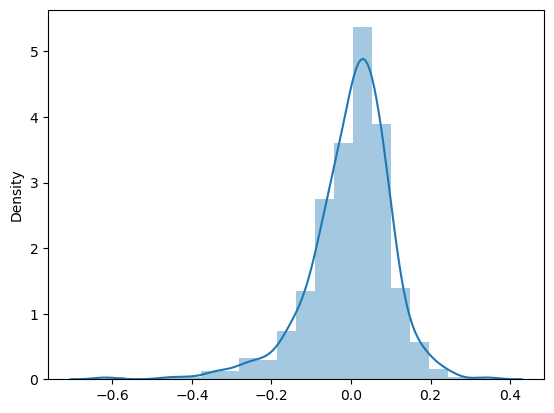

In [62]:
fig = plt.figure
sns.distplot((y_train - y_train_count), bins = 20)

#fig.('Error Terms', fontsize = 20)                  # Plot heading 
#plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final, i.e. fourth model.

In [63]:
# Test Data

y_test = df_test.pop('cnt')
X_test = df_test

# Adding a constant variable
#X_test_new = sm.add_constant(X_test)
#num_vars1 = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

#df_test[num_vars] = scaler.transform(df_test[num_vars1])

df_test.head()


df_test.describe()



,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,Aug,Dec,Feb,Jan,July,June,March,May,Nov,Oct,Sep,Mist,clear,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,0.086364,0.072727,0.086364,0.086364,0.318182,0.654545,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,0.281541,0.260281,0.281541,0.281541,0.466833,0.476601,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
X_test_sm = X_test[X_train_new.columns]
X_test_sm = sm.add_constant(X_test_sm)


X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_summer,season_winter,July,Sep,Mist
184,1.0,0,1,0.831783,0.084219,0,0,0,1,0,1
535,1.0,1,0,0.901354,0.153728,0,1,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,1,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,1,0,0,0,0


In [65]:

y_test_pred = lm.predict(X_test_sm)

In [66]:
# Evaluate
r2_score(y_true= y_test, y_pred=y_test_pred)

0.7777501913564925

### R - Square of train and test data comparison and conclusion

R-squared:                       0.792 ( Training Data )
R-squared:                       0.777  ( Test Data)

Which shows the model is correct for making the predictions.